In [1]:
from apts import *
import pandas as pd
%matplotlib inline  
#%config InlineBackend.figure_format = 'svg'

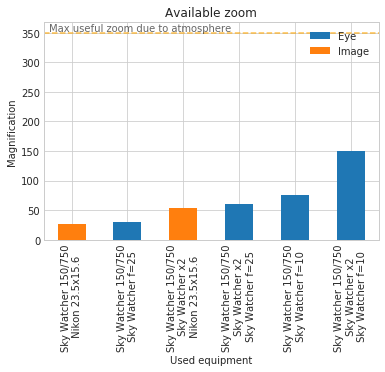

In [2]:
e = Equipment()

sky_watcher = "Sky Watcher"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

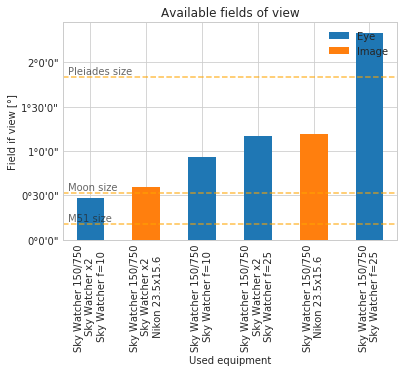

In [3]:
e.plot_fov()

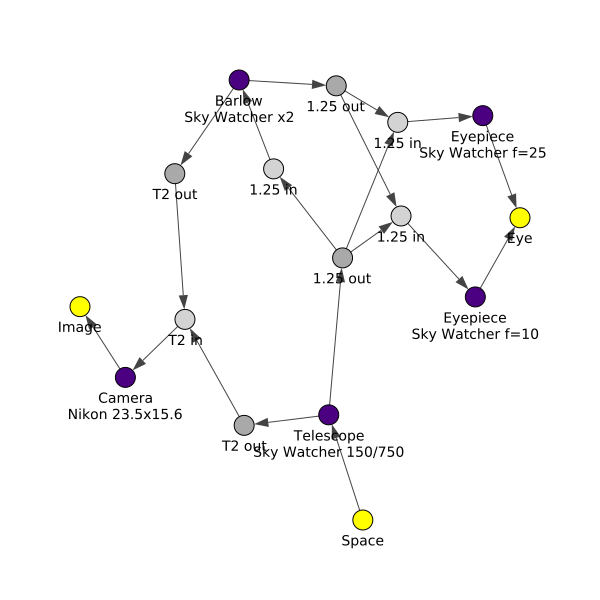

In [4]:
e.plot_connection_graph()

In [5]:
data = e.data()
data[data.Useful== True].sort_values(['Zoom'], ascending=[0])

,ID,Label,Type,Zoom,Useful,FoV,Exit pupil,Dawes' limit,Range,Brightness,Elements
1,1,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=10",Eye,150.00000,True,0.466667,1.0 millimeter,0.773 arcsecond,13.580456,2.040816,3
3,3,"Sky Watcher 150/750, Sky Watcher f=10",Eye,75.00000,True,0.933333,2.0 millimeter,0.773 arcsecond,13.580456,8.163265,2
0,0,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=25",Eye,60.00000,True,1.166667,2.5 millimeter,0.773 arcsecond,13.580456,12.755102,3
4,4,"Sky Watcher 150/750, Sky Watcher x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,0.0 millimeter,0.773 arcsecond,13.580456,16.236939,3
2,2,"Sky Watcher 150/750, Sky Watcher f=25",Eye,30.00000,True,2.333333,5.0 millimeter,0.773 arcsecond,13.580456,51.020408,2
5,5,"Sky Watcher 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,0.0 millimeter,0.773 arcsecond,13.580456,64.947755,2


In [6]:
place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

In [7]:
place.sunset_time()

datetime.datetime(2018, 5, 4, 20, 4, 43, 828685, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

In [8]:
place.get_weather()

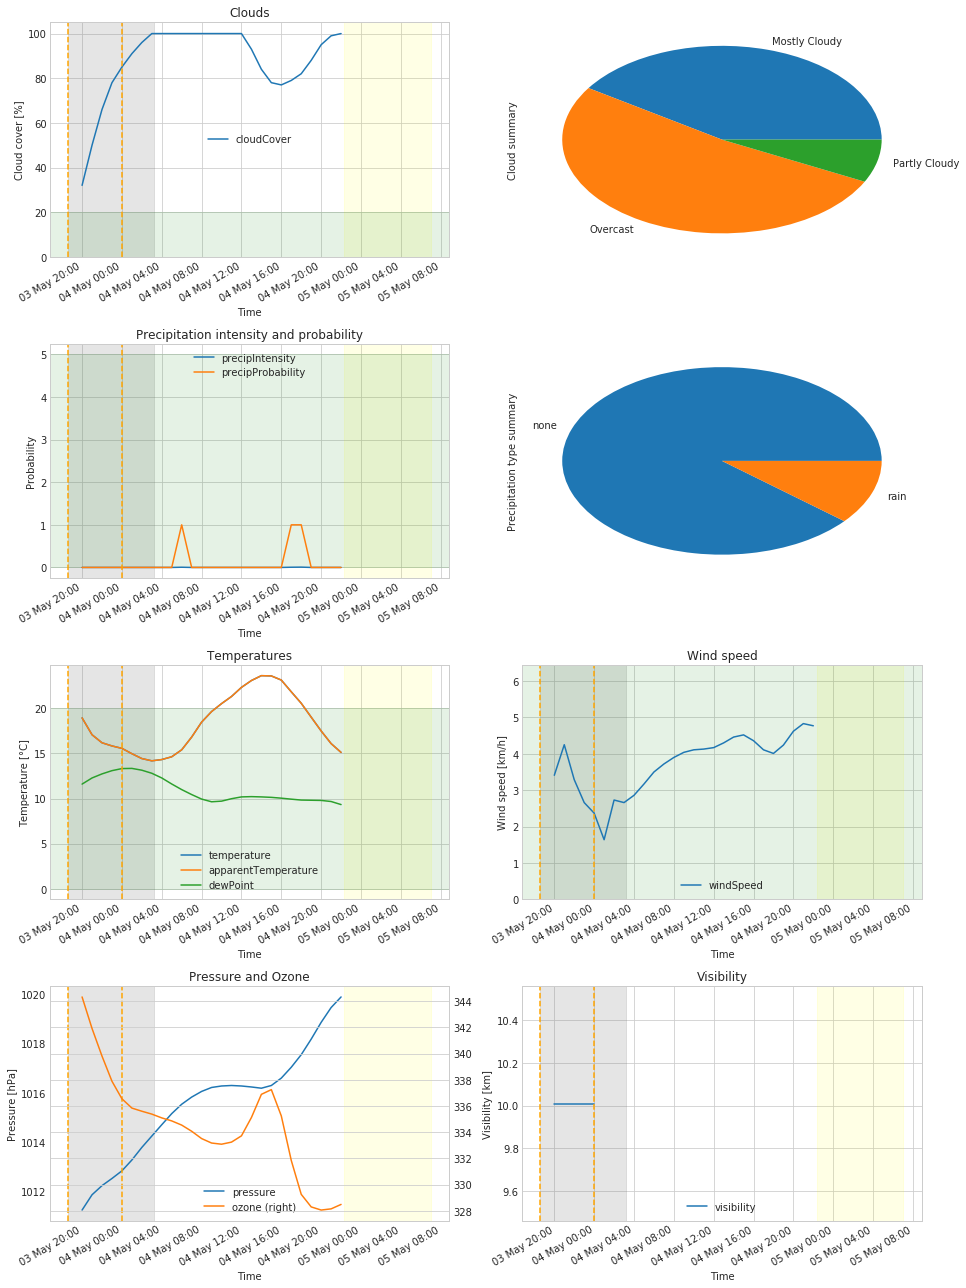

In [9]:
o.plot_weather()

In [10]:
o.weather_is_good()

False

In [11]:
o.place._moon_phase_letter()

'P'

In [12]:
o.place.moon_phase()

59

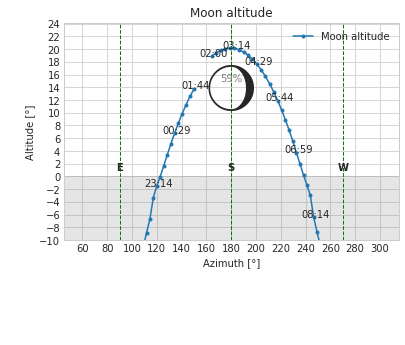

In [13]:
o.place.plot_moon_path()

In [14]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [15]:
o.local_planets.objects

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase
0,"<Mercury ""Mercury"" at 0x7f66539d5358>",Mercury,2018-05-04 11:01:09.743186+02:00,2018-05-04 04:38:21.735283+02:00,2018-05-04 17:25:05.768845+02:00,43.953043,0.29,1.151780,4.100399,0.911789,7.392061,-26.514189,51.064026
1,"<Venus ""Venus"" at 0x7f66539d54e0>",Venus,2018-05-04 14:32:33.115046+02:00,2018-05-04 06:24:24.292456+02:00,2018-05-04 22:41:38.100346+02:00,63.055582,-3.84,4.684585,23.211325,1.432160,11.814324,27.941406,87.671661
2,"<Mars ""Mars"" at 0x7f66539d5668>",Mars,2018-05-04 05:41:20.509383+02:00,2018-05-04 01:36:52.878538+02:00,2018-05-04 09:45:53.406506+02:00,17.321235,-0.46,19.806843,-22.565794,0.819281,11.424645,-108.751175,88.378799
3,"<ephem.Jupiter ""Jupiter"" at 0x7f6653df6a40>",Jupiter,2018-05-04 01:01:20.064035+02:00,2018-05-04 20:15:27.730167+02:00,2018-05-04 05:42:39.546212+02:00,23.629403,-2.36,15.127275,-16.243032,4.406260,44.650116,-174.316467,99.991478
4,"<ephem.Saturn ""Saturn"" at 0x7f6653df6bb0>",Saturn,2018-05-04 04:31:47.236055+02:00,2018-05-05 00:21:34.759402+02:00,2018-05-04 08:37:57.541164+02:00,17.637142,0.33,18.644427,-22.248919,9.458128,17.508749,-124.653610,99.829979
5,"<Uranus ""Uranus"" at 0x7f66539d57f0>",Uranus,2018-05-04 11:41:59.635071+02:00,2018-05-04 04:46:45.352526+02:00,2018-05-04 18:37:17.412554+02:00,50.611903,5.90,1.834169,10.762686,20.863798,3.378148,-14.505451,99.995972
6,"<Neptune ""Neptune"" at 0x7f66539d5978>",Neptune,2018-05-04 09:02:03.420758+02:00,2018-05-04 03:30:19.934939+02:00,2018-05-04 14:33:48.058485+02:00,33.457624,7.93,23.161255,-6.402566,30.467026,2.241571,-57.843464,99.979683


In [16]:
o.get_visible_planets()

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase
3,"<ephem.Jupiter ""Jupiter"" at 0x7f6653df6a40>",Jupiter,2018-05-04 01:01:20.064035+02:00,2018-05-04 20:15:27.730167+02:00,2018-05-04 05:42:39.546212+02:00,23.629403,-2.36,15.127275,-16.243032,4.406260,44.650116,-174.316467,99.991478
2,"<Mars ""Mars"" at 0x7f66539d5668>",Mars,2018-05-04 05:41:20.509383+02:00,2018-05-04 01:36:52.878538+02:00,2018-05-04 09:45:53.406506+02:00,17.321235,-0.46,19.806843,-22.565794,0.819281,11.424645,-108.751175,88.378799


In [17]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
101,M102,Spindle Galaxy,NGC 5866,Lenticular (S0) Galaxy,Draco,9.9,40000000,15.108333,55.766667,5.2,2.3,2018-05-04 01:00:43.631509+02:00,84.467529
4,M5,-,NGC 5904,Globular Cluster,Serpens Caput,5.6,24500,15.310000,2.083333,17.4,17.4,2018-05-04 01:13:12.055801+02:00,41.871884


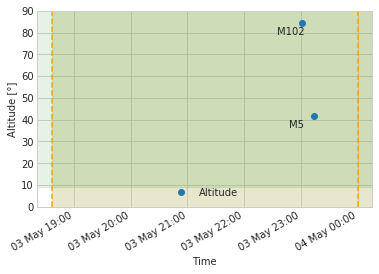

In [18]:
o.plot_messier()

In [19]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)